# About


In [ ]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../../models"

/Users/catherine/opt/anaconda3/envs/icl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# Get dataframe of model information
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
0,mamba,kernel_regression,mamba_toy,,-1,-1,20,4,NaN,mamba_toy
1,nanogpt,kernel_regression,nanogpt_kernel_regression,,-1,-1,5,6,4.0,nanogpt_kernel_regression


In [22]:
#task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"
task = "kernel_regression"

run_id = "mamba"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Figure 1: Context Window Size vs. Squared Error

nanogpt_kernel_regression nanogpt


100%|██████████| 1/1 [00:00<00:00, 1406.07it/s]


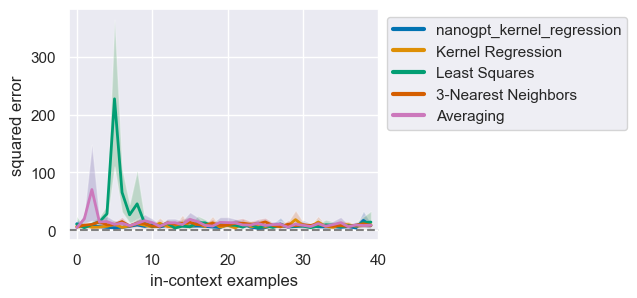

In [25]:
run_id = "nanogpt"

run_path = os.path.join(run_dir, task, run_id)

def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task + "_" + run_id]
basic_plot(metrics["standard"], models=models)
plt.show()

mamba_toy mamba


100%|██████████| 1/1 [00:00<00:00, 7928.74it/s]


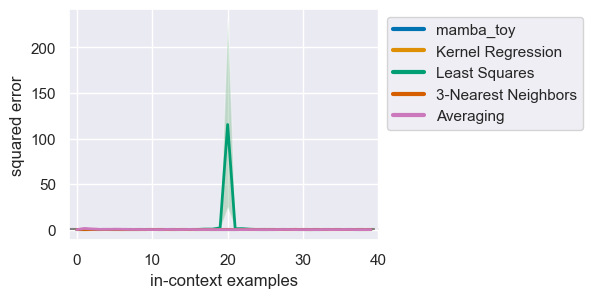

In [26]:
run_id = "mamba"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)

def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task + "_" + run_id]
basic_plot(metrics["standard"], models=models)
plt.show()